## Predict future stock prices (usually Close price) using historical data.

### 💹 Stock Price Prediction (ML Application)
**Definition** : Stock Price Prediction involves time series forecasting where machine learning models predict future stock prices using historical data such as:
* Open price

* High price

* Low price

* Close price

(Collectively called OHLC data)

### Overview
This dataset contains comprehensive stock market data for June 2025, featuring daily trading information across multiple sectors. The dataset includes 14 key financial metrics and indicators, making it ideal for financial analysis, machine learning projects, and algorithmic trading research.

### Dataset Features
Core Price Data
* Date: Trading date in YYYY-MM-DD format
* Ticker: Stock symbol identifier
* Open: Opening price for the trading day
* Close: Closing price for the trading day
* High: Highest price reached during the day
* Low: Lowest price reached during the day
Trading Metrics
* Volume: Number of shares traded
* Market Cap: Total market capitalization
Financial Ratios & Indicators
* PE Ratio: Price-to-Earnings ratio for valuation analysis
* Dividend Yield: Annual dividend as percentage of stock price
* EPS: Earnings Per Share
* 52 Week High: Highest price in the past 52 weeks
* 52 Week Low: Lowest price in the past 52 weeks

### Import Library



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
#loading data
from google.colab import drive
drive.mount('/content/drive')
df_sm= pd.read_csv("/content/drive/My Drive/Colab Notebooks/Module: Machine Learning/Machine Learning Project/stock_market_2025.csv")

Mounted at /content/drive


In [3]:
# Rename columns for convenience
df_sm.columns = [col.strip().replace(" ", "_").lower() for col in df_sm.columns]

In [5]:
df_sm.head()

,date,ticker,open_price,close_price,high_price,low_price,volume_traded,market_cap,pe_ratio,dividend_yield,eps,52_week_high,52_week_low,sector
0,01-06-2025,SLH,34.92,34.53,35.22,34.38,2966611,5.738136e+10,29.63,2.85,1.17,39.39,28.44,Industrials
1,01-06-2025,WGB,206.50,208.45,210.51,205.12,1658738,5.274707e+10,13.03,2.73,16.00,227.38,136.79,Energy
2,01-06-2025,ZIN,125.10,124.03,127.40,121.77,10709898,5.596949e+10,29.19,2.64,4.25,138.35,100.69,Healthcare
3,01-06-2025,YPY,260.55,265.28,269.99,256.64,14012358,7.964089e+10,19.92,1.29,13.32,317.57,178.26,Industrials
4,01-06-2025,VKD,182.43,186.89,189.40,179.02,14758143,7.271437e+10,40.18,1.17,4.65,243.54,165.53,Technology


In [6]:
df_sm.tail()

,date,ticker,open_price,close_price,high_price,low_price,volume_traded,market_cap,pe_ratio,dividend_yield,eps,52_week_high,52_week_low,sector
1757,21-06-2025,ZTL,196.09,199.18,200.08,195.42,2749236,9.946662e+10,22.17,1.26,8.98,232.20,186.46,Technology
1758,21-06-2025,XOE,105.08,108.08,109.90,104.68,4582198,5.017450e+10,35.74,1.79,3.02,129.28,75.71,Technology
1759,21-06-2025,EIE,18.88,18.46,18.95,18.23,6997077,8.502518e+09,10.18,2.09,1.81,24.50,14.64,Energy
1760,21-06-2025,XYQ,154.55,158.57,160.85,152.37,3549117,9.663899e+10,29.64,1.71,5.35,199.23,149.78,Communication Services
1761,21-06-2025,UAA,201.52,198.09,205.08,195.70,6484178,1.563642e+10,27.75,1.18,7.14,258.92,184.92,Materials


In [7]:
df_sm.shape

(1762, 14)

In [8]:
# Basic information of dataset
df_sm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1762 entries, 0 to 1761
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            1762 non-null   object 
 1   ticker          1762 non-null   object 
 2   open_price      1762 non-null   float64
 3   close_price     1762 non-null   float64
 4   high_price      1762 non-null   float64
 5   low_price       1762 non-null   float64
 6   volume_traded   1762 non-null   int64  
 7   market_cap      1762 non-null   float64
 8   pe_ratio        1762 non-null   float64
 9   dividend_yield  1762 non-null   float64
 10  eps             1762 non-null   float64
 11  52_week_high    1762 non-null   float64
 12  52_week_low     1762 non-null   float64
 13  sector          1762 non-null   object 
dtypes: float64(10), int64(1), object(3)
memory usage: 192.8+ KB


Chage to datetime

In [4]:
# Get descriptive statistics
df_sm.describe()

,open_price,close_price,high_price,low_price,volume_traded,market_cap,pe_ratio,dividend_yield,eps,52_week_high,52_week_low
count,1762.000000,1762.000000,1762.000000,1762.000000,1.762000e+03,1.762000e+03,1762.000000,1762.000000,1762.000000,1762.000000,1762.000000
mean,157.500443,157.567054,160.423258,154.703956,8.075851e+06,6.520977e+10,23.143859,2.337327,7.663621,189.009381,125.964574
std,82.043046,82.227448,83.626559,80.647073,5.104890e+06,1.467168e+11,7.498239,1.124037,5.202411,99.082291,67.767279
min,15.020000,14.770000,15.120000,14.480000,5.007270e+05,1.290761e+09,8.020000,0.010000,0.470000,17.030000,10.010000
25%,86.592500,87.055000,88.487500,85.380000,4.268123e+06,2.717406e+10,16.997500,1.450000,3.745000,104.687500,66.662500
50%,155.675000,155.675000,158.820000,152.725000,7.911528e+06,5.135322e+10,22.620000,2.330000,6.790000,185.425000,123.040000
75%,227.207500,227.902500,231.627500,223.102500,1.160026e+07,7.623076e+10,28.977500,3.127500,10.350000,271.920000,179.825000
max,434.400000,447.430000,453.860000,431.500000,6.537774e+07,3.481112e+12,44.890000,5.000000,54.100000,571.570000,345.530000


In [ ]:
df_sm.isnull().sum()

In [9]:
print(df_sm.duplicated().sum())

0


In [29]:
# Get descriptive statistics
df_sm.describe(include='object')

,date,ticker,sector
count,1762,1762,1762
unique,21,1691,11
top,04-06-2025,GFF,Materials
freq,98,2,170


In [ ]:
df_sm.dtypes

In [6]:
# create new data frame from original dataset for further data cleaning and analysis.
df = df_sm.copy()

### Feature Engineering

In [7]:
df['date'] = pd.to_datetime(df['date'],format='%d-%m-%Y')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1762 entries, 0 to 1761
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            1762 non-null   datetime64[ns]
 1   ticker          1762 non-null   object        
 2   open_price      1762 non-null   float64       
 3   close_price     1762 non-null   float64       
 4   high_price      1762 non-null   float64       
 5   low_price       1762 non-null   float64       
 6   volume_traded   1762 non-null   int64         
 7   market_cap      1762 non-null   float64       
 8   pe_ratio        1762 non-null   float64       
 9   dividend_yield  1762 non-null   float64       
 10  eps             1762 non-null   float64       
 11  52_week_high    1762 non-null   float64       
 12  52_week_low     1762 non-null   float64       
 13  sector          1762 non-null   object        
dtypes: datetime64[ns](1), float64(10), int64(1), object(2)
m

In [ ]:
# Feature Engineering
# df['Price_Range'] = df['High'] - df['Low']
# df['Volatility'] = (df['High'] - df['Low']) / df['Open']
# df['Daily_Return'] = (df['Close'] - df['Open']) / df['Open']

In [15]:
#df['day'] = df['date'].dt.day
#df['Month'] = df['Date'].dt.month
#df['DayOfWeek'] = df['Date'].dt.dayofweek

**Add three New colums Datetime to day , month and dayofweek split**

## **EDA**

In [10]:
df.columns

Index(['date', 'ticker', 'open_price', 'close_price', 'high_price',
       'low_price', 'volume_traded', 'market_cap', 'pe_ratio',
       'dividend_yield', 'eps', '52_week_high', '52_week_low', 'sector'],
      dtype='object')

### **Sector Distribution**

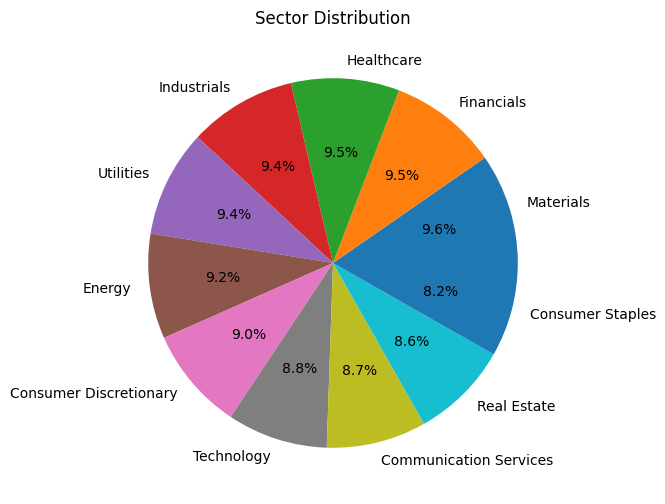

In [11]:
plt.figure(figsize=(10,6))
plt.pie(df['sector'].value_counts(),labels=df['sector'].value_counts().index,autopct='%1.1f%%')
plt.title('Sector Distribution')
plt.show()

### **Top 5 Sectors Max Price Date-wise**

In [19]:
top_5_sectors = df['sector'].value_counts().head(5).index.tolist()
print("Top 5 Sectors:", top_5_sectors)
# Filter dataset to include only top 5 sectors
top_sectors_df = df[df['sector'].isin(top_5_sectors)]
# Group by Sector and Date, then get max High Price
sector_date_high = top_sectors_df.groupby(['sector', 'date'])['high_price'].max().reset_index()

# Sort by Sector and Date
sector_date_high = sector_date_high.sort_values(['sector', 'date'])

# Display results
#print(sector_date_high.head(10))  # Just show top 10 rows

#plt.figure(figsize=(12, 6))
#sns.lineplot(data=sector_date_high, x='date', y='high_price', hue='sector')
#plt.title('Date-wise High Price for Top 5 Sectors')
#plt.xlabel('Date')
#plt.ylabel('High Price')
#plt.legend(title='Sector')
#plt.grid()
#plt.show()

Top 5 Sectors: ['Materials', 'Financials', 'Healthcare', 'Industrials', 'Utilities']


In [ ]:
price_cols = ['open_price', 'close_price', 'high_price','low_price',
       'dividend_yield', 'eps', '52_week_high', '52_week_low']

for col in price_cols:
        # Group by Sector and Date, then get max(price_cols) like...High Price
        sector_date_high = top_sectors_df.groupby(['sector', 'date'])[col].max().reset_index()
        # Sort by Sector and Date
        sector_date_high = sector_date_high.sort_values(['sector', 'date'])
        # Plot
        plt.figure(figsize=(12, 4))
        sns.lineplot(data=sector_date_high, x='date', y=col, hue='sector')
        plt.title(f'Date-wise {col} for Top 5 Sectors')
        plt.xlabel('Date')
        plt.ylabel(col)
        plt.legend(title='Sector')
        plt.grid()
        plt.show()



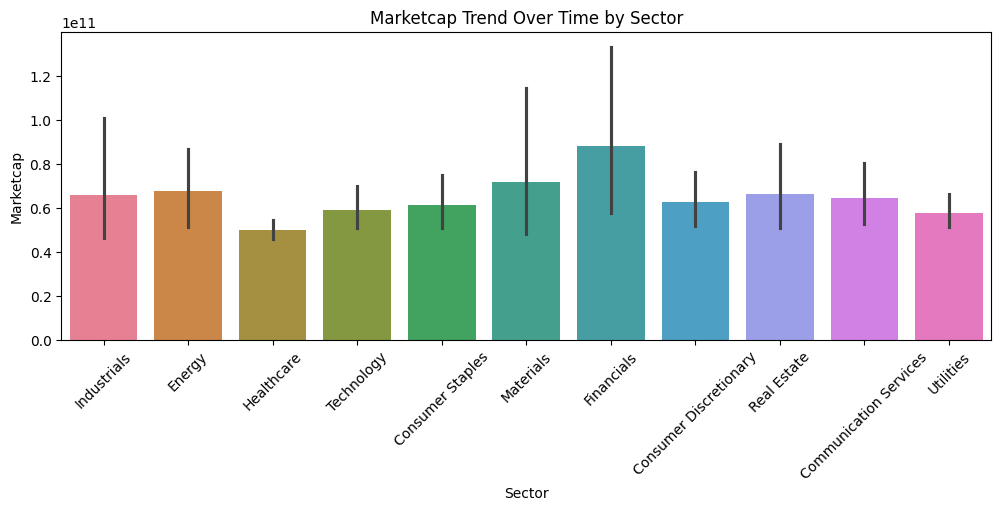

In [16]:
plt.figure(figsize=(12,4))
sns.barplot(data=df,x='sector',y='market_cap',hue='sector')
plt.title('Marketcap Trend Over Time by Sector')
plt.xlabel('Sector')
plt.ylabel('Marketcap')
plt.xticks(rotation=45)
plt.show()

In [ ]:
plt.figure(figsize=(12,5))
sns.pairplot(df,hue='sector')
plt.show()

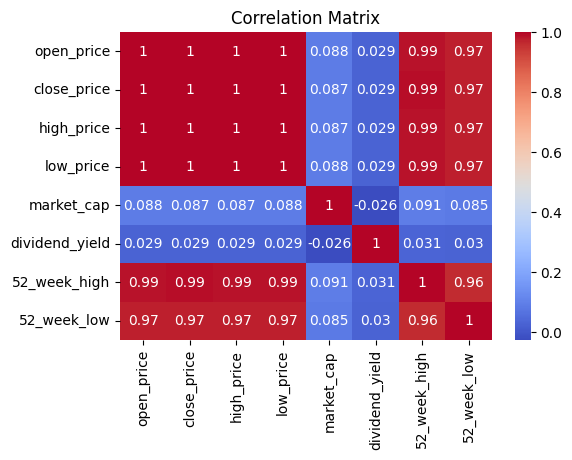

In [14]:
num_cols = ['open_price', 'close_price', 'high_price', 'low_price',
            'market_cap', 'dividend_yield', '52_week_high', '52_week_low']

corr = df[num_cols].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### **how to do Stock Price Prediction using Time Series Forecasting with OHLC data**

✅ What you'll predict:

You want to predict the next day’s Close price using past OHLC data (Open, High, Low, Close).



##**ML**
### Feature Engineering and Target Selection

In [88]:
stock_df = df.copy()

In [ ]:
stock_df['ticker'].rename('ticker',inplace=True)

In [65]:
stock_df.shape

(1762, 14)

In [ ]:
stock_df.columns

In [75]:
# Make sure your DataFrame is sorted by date
stock_df.sort_values(by='date', inplace=True)

In [76]:
# Shift the 'close_price' column to create the next day's close as the target
stock_df['next_close_price'] = stock_df['close_price'].shift(-1)

# Drop the last row (because it has NaN in target)
#stock_df.dropna(inplace=True)

In [ ]:
stock_df[['date','ticker','open_price', 'close_price','next_close_price']].head(20)

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [46]:
# Define features and target
features = ['open_price', 'close_price', 'high_price',
       'low_price'] #['open_price', 'high_price', 'low_price', 'close_price']
target = 'next_close_price'

X = stock_df[features]
y = stock_df[target]

In [47]:
# Split the data (no shuffle because it's time series)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=42)

In [48]:
X_train.shape , X_test.shape

((1408, 4), (353, 4))

In [49]:
# Train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict the next day's Close
y_pred = model.predict(X_test)

In [51]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R2 Score: {r2:.2f}")

Mean Squared Error: 9257.22
R2 Score: -0.32


In [52]:
scaler = StandardScaler()

# Fit on training data only, then transform both
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [53]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)
#Evaluate the Model
y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error: 7103.97
R² Score: -0.01


In [ ]:
stock_df[['open_price', 'close_price', 'high_price',
       'low_price','next_close_price']]

In [ ]:
# Plot actual vs predicted close prices
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual Next Close', color='blue')
plt.plot(y_pred, label='Predicted Next Close', color='orange')
plt.title("Prediction of Next Day's Close Price using Today's OHLC")
plt.xlabel("Sample Index")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.show()


**Plot Actual vs Predicted**

In [ ]:
#Plot Actual vs Predicted

plt.figure(figsize=(10, 5))
plt.plot(y_test.values[:50], label='Actual Close Price')
plt.plot(y_pred[:50], label='Predicted Close Price')
plt.xlabel("Days")
plt.ylabel("Price")
plt.title("Stock Price Prediction (Next Day Close)")
plt.legend()
plt.grid(True)
plt.show()